# **Implementing a 2 Layer Fully connected Nueral Net using Standard Libraries(pytorch) for classification**.



## 1.  KEY TAKE AWAYS


* There was no real linear trend found.
*   It is good to overfit our model first and then fit it correctly.
*   Tuning the hyperparameters is far from intuitive. Accuracies and loss trends are linear only in small neighborhood.
*   Accuracy and Loss for training / testing need not go hand in hand. Once, it was noticed that training higher, but training accuracy was better.
*   Using Momentum helped converge rapidly.
*   Reducing batch size also helped converge quickly.
*   Early stopping in cases when Loss was stagnant didn't seem to help much. 
*   Having some momentum did help converge faster but it also overfit the model.
*   The same accuracy can be achieved with a diverse set of hyperparameters.
* L2 regularization was key to avoid overfitting. 



## 2.  THINGS TO EXPLORE / UNANSWERED QUESTIONS

* Not sure why augmentation of data didn't help much(horizontal flip).
* Would  (lr + zero momentum for high epochs) be better than (lr + high momentum for lower epochs) to avoid overfitting. 
* Not sure why shuffling of data reduced testing accuracy (it did reduce testing loss though).

## 3. LIST OF METHODS EXPLORED
1. **Initializations** : All initializations were random initializations with certain modifications.
* np.rand(fanin, fanout)/100 # tag: divide_by_100.
* np.rand(fanin, fanout)/sqrt(fanin*fanout) # tag: divide_by_sqrt.
* np.rand(fanin, fanout)/(fanin*fanout) # tag: divide_by_prod.

---
2. **Altering Learning rate, Momentum while using SGD** \
* Learning rate and momentum was altered simultaneously while using SGD-M.
---
3. **Batch size and Epochs** \
* Batch size was altered in factors of the data set size. 
* Epochs were tried from range of 1000 - 4000. 
---
4. **Activation Functions** \
* ReLU.
* Leaky ReLU(0.01).
* Softplus(beta = 1, threshold = 5).
---
5. **Optimizers**
* SGDM.
* ADAM.
---
6. **Data Manipulation**
* Shuffling of data between epochs.
* Data augmentation using Horizontal Flipping of images
* Normalizing the feature vector. 
---

## 4. RESULTS AND DISCUSSION

* For most of the trials, only a single hyperparameter was altered to see the effect clearly. 
* Below is a summary of results and analysis of impact of each parameter/ hyperparameter on the losses and accuracies found. The entire list of results can be found [here](https://drive.google.com/drive/folders/1CUuDQfQU6CgQ2jocpdKn8xIWwUGu8I8C?usp=sharing)
---
###  CAT vs NON-CAT CLASSIFIER. 

* BEST OVERALL RESULT



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augment** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.3561758264 | 0.4837650061 | 0.8947368421 | 0.82 | Shuffle=False | Normalize=False | Augment=False |

---

1.   Effect of Initialization: 

* It was seen that the convergence didn't depend much on the initialisation. 
| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_sqrt\_prod | 209 | 3000 | 0.0075 | 0.95 | 0.18 | 0.2347040419 | 0.6292902231 | 0.980861244 | 0.76 |
| divide\_by\_100 | 209 | 3000 | 0.0075 | 0.95 | 0.18 | 0.2347040419 | 0.6292902231 | 0.980861244 | 0.76 |



| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_100 | 19 | 3000 | 0.00025 | 0.8 | 0.15 | 0.223818798 | 0.6097765565 | 0.961722488 | 0.72 |
| divide\_by\_prod | 19 | 3000 | 0.00025 | 0.8 | 0.15 | 0.223818798 | 0.6097765565 | 0.961722488 | 0.72 |


2. Altering Learning rate and Momentum in SGD:
* For the range of epochs in interest, in most of the cases, reducing learning rate also reduced the loss(exception when the learning rate is set really low lr = 0.0001 - 0.0005).
* Increasing the learning rate helped converge quickly to a particular loss but need not necessarily be desirable. 
* Some trends are shown below. 

| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 19 | 3000 | 0.0009 | 0.65 | 0.13 | 0.2087284178 | 0.5798214674 | 0.9330143541 | 0.7 |
| divide\_by\_prod | 19 | 3000 | 0.0025 | 0.65 | 0.13 | 0.2157168673 | 0.5547247529 | 0.8755980861 | 0.78 |



| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 19 | 3000 | 0.003 | 0.7 | 0.13 | 0.3584286625 | 0.5311695933 | 0.9043062201 | 0.8 |
| divide\_by\_prod | 19 | 3000 | 0.003 | 0.75 | 0.13 | 0.3686642213 | 0.6165066361 | 0.9138755981 | 0.62 |

| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_100 | 19 | 3000 | 0.0002 | 0.8 | 0.18 | 0.2603222497 | 0.5928133726 | 0.95215311 | 0.72 |
| divide\_by\_100 | 19 | 3000 | 0.0002 | 0.9 | 0.18 | 0.2597359717 | 0.6020284295 | 0.956937799 | 0.72 |
| divide\_by\_100 | 19 | 3000 | 0.0002 | 1 | 0.15 | 0.2733703445 | 0.7973586917 | 0.8899521531 | 0.64 |



| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 19 | 3000 | 0.0004 | 0.8 | 0.13 | 0.203201829 | 0.6146169305 | 0.966507177 | 0.72 |
| divide\_by\_prod | 19 | 3000 | 0.0004 | 0.85 | 0.13 | 0.2019675523 | 0.6121790409 | 0.966507177 | 0.72 |



| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.15 | 0.3946999637 | 0.5608567595 | 0.9330143541 | 0.76 |
| divide\_by\_prod | 19 | 3000 | 0.003 | 0.55 | 0.13 | 0.2069181827 | 0.6355372071 | 0.9473684211 | 0.74 |



| Optimizer | Activation1 | weight\_init | batch\_size | epochs | learning\_rate | momentum | weight\_decay | train\_loss | test\_loss | train\_acc | test\_acc | Shuffle | Normalize |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.5 | 0.13 | 0.2074568719 | 0.6148176789 | 0.9473684211 | 0.7 | Shuffle=False | Normalize=False |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.3561758264 | 0.4837650061 | 0.8947368421 | 0.82 | Shuffle=False | Normalize=False |



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | softplus | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.2 | 0.2880446532 | 0.6287472844 | 0.971291866 | 0.74 | Shuffle=True | Normalize=False | Augment=False |
| sgdm | softplus | divide\_by\_prod | 19 | 2000 | 0.002 | 0.3 | 0.2 | 0.2732661245 | 0.6515020132 | 0.961722488 | 0.72 | Shuffle=True | Normalize=False | Augment=False |




3. Batch size and Epochs.
* It was generally seen that batch size helped converge faster and epochs sometimes reduced training loss. But most of the times, increase in epochs meant overfitting.  

| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_100 | 209 | 3000 | 0.007 | 0.9 | 0.15 | 0.2120349427 | 0.6499563456 | 0.976076555 | 0.74 |
| divide\_by\_100 | 19 | 3000 | 0.0002 | 0.9 | 0.16 | 0.2360206314 | 0.6092091203 | 0.956937799 | 0.72 |



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.3681054251 | 0.5628615022 | 0.9138755981 | 0.76 | Shuffle=True | Normalize=False |
| sgdm | relu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.65 | 0.13 | 0.3789019991 | 0.6263735294 | 0.966507177 | 0.62 | Shuffle=True | Normalize=False |



| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_100 | 11 | 3000 | 0.0001 | 0.8 | 0.15 | 0.2862188623 | 0.6015170813 | 0.956937799 | 0.74 |
| divide\_by\_100 | 19 | 3000 | 0.00017 | 0.8 | 0.15 | 0.2820716 | 0.6055393815 | 0.961722488 | 0.72 |


4. Activation Functions.
* Most of the iterations were done on Relu and some were tried on Leaky relu with parameter = 0.01. Softplus(logrithmic version near origin and x < 0 was tried.). Below are some results.  


| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 4000 | 0.003 | 0.65 | 0.13 | 0.3534180278 | 0.4922493398 | 0.9330143541 | 0.8 | Shuffle=False | Normalize=False |
| sgdm | lrelu | divide\_by\_prod | 19 | 4000 | 0.003 | 0.65 | 0.13 | 0.1613383862 | 0.6416496038 | 0.961722488 | 0.72 | Shuffle=False | Normalize=False |



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | lrelu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.2 | 0.2721504989 | 0.6085265875 | 0.976076555 | 0.7 | Shuffle=True | Normalize=False | Augment=False |
| sgdm | softplus | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.2 | 0.2880446532 | 0.6287472844 | 0.971291866 | 0.74 | Shuffle=True | Normalize=False | Augment=False |



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | lrelu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.1609131138 | 0.6363658309 | 0.956937799 | 0.72 | Shuffle=False | Normalize=False |
| sgdm | lrelu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.2 | 0.2550611848 | 0.6633317471 | 0.9186602871 | 0.74 | Shuffle=False | Normalize=False |


5. Optimizers.
* Due to lack of time, ADAM couldn't be setup up correctly to run well. Here is the result from the test conducted.



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | softplus | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.23 | 0.2891651785 | 0.6658042073 | 0.9138755981 | 0.66 | Shuffle=False | Normalize=False | Augment=False |
| adam | relu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.23 | 0.6493811878 | 0.8137515187 | 0.6555023923 | 0.34 | Shuffle=False | Normalize=False | Augment=False |



| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| adam | relu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.3 | 0.23 | 0.6553247138 | 1.021014094 | 0.6555023923 | 0.34 | Shuffle=False | Normalize=False | Augment=False |
| adam | relu | divide\_by\_prod | 19 | 2000 | 0.0005 | 0.3 | 0 | 0.646532541 | 0.8413001895 | 0.6555023923 | 0.34 | Shuffle=False | Normalize=False | Augment=False |


6. Data Manipulation.
* As mentioned above, Image flip, Normalization and random shuffling were tried. The trends were far from expected. Here are the results below. 
Change in initializations :


| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.3561758264 | 0.4837650061 | 0.8947368421 | 0.82 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.2541868931 | 0.7055911422 | 0.971291866 | 0.72 | Shuffle=False | Normalize=True | Augment=False |

| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.65 | 0.13 | 0.3789019991 | 0.6263735294 | 0.966507177 | 0.62 | Shuffle=True | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 19 | 2000 | 0.003 | 0.65 | 0.13 | 0.363500671 | 0.530864656 | 0.956937799 | 0.78 | Shuffle=False | Normalize=False | Augment=False |


| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augement Data** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.3561758264 | 0.4837650061 | 0.8947368421 | 0.82 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 19 | 3000 | 0.003 | 0.65 | 0.13 | 0.4042834545 | 0.648612082 | 0.9401913876 | 0.64 | Shuffle=False | Normalize=False | Augment=True |

###  **MOVIE REVIEW CLASSIFIER**

* Just like the above results, the results for movie classifier is trained. Here are some of the trends. 

Best result

| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 800 | 2000 | 0.01 | 0 | 0 | 0.2558433414 | 0.3977315724 | 0.95375 | 0.855721393 |





| **Weight\_init** | **Batch\_size** | **Epochs** | **Learning\_Rate** | **Momentum** | **Weight\_decay(L2)** | **Train\_Loss** | **Test\_Loss** | **Train\_accuracy** | **Test\_accuracy** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| divide\_by\_prod | 209 | 2000 | 0.0075 | 0.65 | 0.15 | 0.1943106055 | 0.6770002842 | 0.980861244 | 0.72 |
| divide\_by\_prod | 800 | 1 | 0.0075 | 0 | 0 | 0.7290261388 | 0.7076601982 | 0.5 | 0.5024875622 |
| divide\_by\_prod | 800 | 2000 | 0.01 | 0 | 0 | 0.2558433414 | 0.3977315724 | 0.95375 | 0.855721393 |





| **Optimizer** | **Activation1** | **weight\_init** | **batch\_size** | **epochs** | **learning\_rate** | **momentum** | **weight\_decay** | **train\_loss** | **test\_loss** | **train\_acc** | **test\_acc** | **Shuffle** | **Normalize** | **Augment** |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| sgdm | relu | divide\_by\_prod | 19 | 4000 | 0.0005 | 0 | 0.19 | 0.5806348774 | 0.6241386533 | 0.9125 | 0.7960199005 | Shuffle=True | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2000 | 0.01 | 0 | 0 | 0.1482970268 | 0.4090732634 | 0.97875 | 0.8109452736 | Shuffle=True | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2000 | 0.01 | 0 | 0 | 0.1482970268 | 0.4090732634 | 0.97875 | 0.8109452736 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2400 | 0.01 | 0 | 0 | 0.1095552891 | 0.4087891579 | 0.99375 | 0.8109452736 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2400 | 0.01 | 0 | 0.1 | 0.394879669 | 0.507001698 | 0.94375 | 0.8009950249 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2400 | 0.01 | 0 | 0.03 | 0.194884792 | 0.4159950912 | 0.97625 | 0.8109452736 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2400 | 0.008 | 0 | 0.03 | 0.2381031513 | 0.4295300245 | 0.96125 | 0.7960199005 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 800 | 2400 | 0.01 | 0.2 | 0.03 | 0.1641093493 | 0.4095226824 | 0.9925 | 0.8208955224 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | relu | divide\_by\_prod | 200 | 2400 | 0.0025 | 0.2 | 0.03 | 0.163932655 | 0.4093410373 | 0.9925 | 0.8208955224 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | lrelu | divide\_by\_prod | 200 | 2400 | 0.0025 | 0.2 | 0.03 | 0.163925387 | 0.4093404412 | 0.9925 | 0.8208955224 | Shuffle=False | Normalize=False | Augment=False |
| sgdm | softplus | divide\_by\_prod | 200 | 2400 | 0.0025 | 0.2 | 0.03 | 0.2818528786 | 0.4473121166 | 0.94875 | 0.8009950249 | Shuffle=False | Normalize=False | Augment=False |
| adam | relu | divide\_by\_prod | 200 | 500 | 0.0025 | 0.2 | 0.03 | 0.1230824292 | 0.4133555591 | 1 | 0.8308457711 | Shuffle=False | Normalize=False | Augment=False |






## Import essential libraries

In [0]:
import torch
import torch.nn as nn
import numpy as np
import h5py
import time
import matplotlib.pyplot as plt
from googleapiclient.http import *
import torchvision.transforms as transforms
import torch.nn.functional as F
import re
from PIL import Image
from google.colab.patches import cv2_imshow
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!pip install pypandoc


global model, optimizer, loss_fn


### **Importing the Data set**


In [2]:
from google.colab import drive
drive.mount('/content/drive')
!pwd
%cd drive/My\ Drive

!cp Colab\ Notebooks/hw3_vishnuu.ipynb ./
!jupyter nbconvert --to PDF "hw3_vishnuu.ipynb"


import os
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content
/content/drive/My Drive


In [0]:
def load_img_data(train_file, test_file, augment = False):
    # Load the training data
    train_dataset = h5py.File(train_file, 'r')
    
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = train_dataset['train_set_x']
    train_set_y_orig = train_dataset['train_set_y']

    # Load the test data
    test_dataset = h5py.File(test_file)
    
    # Separate features(x) and labels(y) for training set
    test_set_x_orig = test_dataset['test_set_x']
    test_set_y_orig = test_dataset['test_set_y']

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = np.array(train_set_y_orig[:])
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = np.array(test_set_y_orig[:])
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))

    if augment == True:
      transform = transforms.RandomHorizontalFlip(p=1)
      imgs = np.zeros(train_set_x_orig.shape, dtype = np.uint8)
      for i in range(train_set_x_orig.shape[0]):
        imgs[i,:] = np.array(transform(Image.fromarray(train_set_x_orig[i,:])), dtype=np.uint8)
      train_set_x_orig = np.append(train_set_x_orig, imgs, axis = 0)
      train_set_y_orig = np.append(train_set_y_orig, train_set_y_orig, axis = 1)

               

    train_x_flatten = np.array(train_set_x_orig).reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
    test_x_flatten = np.array(test_set_x_orig).reshape(test_set_x_orig.shape[0], -1).T

    train_data = torch.tensor(train_x_flatten/255.).float()
    test_data = torch.tensor(test_x_flatten/255.).float()
    # train_data = train_x_flatten/255.
    # test_data = test_x_flatten/255.
    train_label = torch.tensor(train_set_y_orig).float()
    test_label = torch.tensor(test_set_y_orig).float()
    
    return train_data, train_label, test_data, test_label


In [0]:
train_file="data/train_catvnoncat.h5"
test_file="data/test_catvnoncat.h5"
# print(os.getcwd())
train_data, train_label, test_data, test_label = load_img_data(train_file, test_file, augment = True)
print(train_data.shape)

**Normalize image data**


In [0]:
def normalize_img_data(data):
  data_mean = torch.mean(data, axis = 1)
  data = data - data_mean[:, None]
  # print(type(data))
  return data

**Random Shuffle of data**

In [0]:
def random_shuffle(data, label):
  rand_idx = torch.randperm(data.shape[1])
  data = data[:,rand_idx]
  label = label[:, rand_idx]
  # print(data[:,0])
  return data, label

### **We define a nueral net model by inheriting nn.Module from Torch's libraries.**






In [0]:
class net(nn.Module):
  
  def __init__(self, n1, n2, nx, act1):
    torch.manual_seed(0)
    super(net, self).__init__()
    self.fc1 = nn.Linear(nx, n1).float()
    self.fc1.weights = nn.Parameter(torch.randn(nx,n1)/(nx*n1))
    self.fc1.bias = nn.Parameter(torch.randn(n1))
    self.fc2 = nn.Linear(n1,n2).float()
    self.fc2.weights = nn.Parameter(torch.randn(n1,n2)/(n1*n2))
    self.fc2.bias = nn.Parameter(torch.randn(n2))
    self.act1 = act1
    
  def forward(self,X):
    if self.act1 == "relu":
      A1 = F.relu(self.fc1(X))
    elif self.act1 == "lrelu":
      A1 = F.leaky_relu(self.fc1(X), negative_slope=0.01)
    elif self.act1 == "softplus":
      A1 = F.softplus(self.fc1(X), beta = 1, threshold = 5)
    A2 = torch.sigmoid(self.fc2(A1))

    return A2

### **We define the hyper parameters next**. 

In [0]:
nx = train_data.shape[0] # feature size of the input
n1 = 7     # number of nuerons in first layer
n2 = 1     # number of nuerons in the final layer
learning_rate = 0.0075 # Setting the Learning rate
momentum = 0.8         # Momentum for SGD with momentum
bs = 209     # Entire Dataset
ep = 2500        # Number of times entire training data set is seen
weight_decay = 0.05 # L2 normalization parameter
weight_init = "xavier"
optimizer_name = "sgdm"
# print (nx)

### **Now we design our nueral net and instantiate it.**

In [0]:
  def net_init(nx, n1, n2, act1, optimizer_name):
    global model, optimizer, loss_fn
    if optimizer_name == "sgdm":
      model = net(n1, n2, nx, act1)
      optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum = momentum, weight_decay=weight_decay)
      loss_fn = nn.BCELoss()
    if optimizer_name == "adam":
      model = net(n1, n2, nx, act1)
      optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate, betas = betas_adam, weight_decay= weight_decay)
      loss_fn = nn.BCELoss()  

### **Training the Model**

In [377]:
def train_model(train_data, train_label, batch_size = 209, epochs = 2500, plot = True, normalize = False, shuffle= False, augment = False):
  global model, optimizer, loss_fn
  if augment_data = True:
    train_data = augment_data(train_data)
  if normalize == True:
    train_data = normalize_img_data(train_data)

  t0 = time.time()
  train_loss = []
  for epoch in range(epochs):
    model.train()   # setting model to training phase
    train_epoch_loss = []
    if shuffle==True:
      train_data, train_label = random_shuffle(train_data, train_label)

    for i in range(0, train_data.shape[1], batch_size):
      tdata = train_data[:,i :  i+batch_size-1].T
      ldata = train_label[:,i : i+batch_size-1].T
      # print(tdata.shape)
      model_output = model(tdata)
      loss = loss_fn(model_output, ldata)
      # print(loss.item())
      train_epoch_loss.append(loss.item())
      # print(train_loss)
      optimizer.zero_grad()
      # print(type(train_loss))
      loss.backward()
      optimizer.step()

    train_loss.append(float(sum(train_epoch_loss))/float(len(train_epoch_loss)))  

    if epoch%100 == 0:
      # print(train_loss)
      print("Epoch: " + str(epoch) + ", Training Loss: " + str(float(sum(train_epoch_loss))/float(len(train_epoch_loss))))
  tloss = float(sum(train_epoch_loss))/float(len(train_epoch_loss))
  print("Epoch: " + str(epoch) + ", Training Loss: " + str(tloss))       
  # print(len(train_loss))
  fig = plt.figure()
  if plot:
    plt.plot(np.squeeze(train_loss), 'b')
    plt.ylabel('loss')
    plt.xlabel('Number of batches')
    plt.title('Loss plot, Learning rate: {}, Epochs: {} '.format(learning_rate, epochs)  )
    plt.show() 
  
  return tloss, batch_size, epochs, fig

SyntaxError: ignored

In [0]:
net_init(nx, n1, n2, "relu", "sgdm")
train_loss, batch_size, epochs, fig = train_model(train_data, train_label, 209, 2000)

### **Running on Test Set**

In [0]:
def test_model(tdata, ldata, normalize = False):
  if normalize == True:
    tdata = normalize_img_data(tdata)
  t0 = time.time()
  model.eval()
  test_loss = []
  with torch.no_grad():
    # print(tdata.shape)
    model_output = model(tdata.T)
    loss = loss_fn(model_output, ldata.T)
    
    
    test_loss.append(loss.item())
  test_loss = sum(test_loss)/len(test_loss)
  
  return test_loss   

In [0]:
test_loss = test_model(test_data,test_label)
print("Testing Loss: " + str(test_loss))

### **Find the Training and Testing Accuracies**

In [0]:
def train_accuracy(tdata, ldata, normalize = False):
  if normalize == True:
    tdata = normalize_img_data(tdata)
  model.eval()

  with torch.no_grad():
    model_output = model(tdata.T)
    probas = np.zeros(model_output.shape)
    probas = np.where(model_output > 0.5, 1, 0)
    # print(ldata)
    trA = np.mean(np.where( (probas - ldata.T.data.numpy())  == 0, 1, 0))
    
    return trA

In [0]:
trA = train_accuracy(train_data, train_label)
print("Training Accuracy seen: " + str(trA))

Training Accuracy seen: 0.9952153110047847


In [0]:
def test_accuracy(tdata, ldata, normalize = False):
  if normalize == True:
    tdata = normalize_img_data(tdata)
  model.eval()
  with torch.no_grad():
    model_output = model(tdata.T)
    probas = np.zeros(model_output.shape)
    probas = np.where(model_output > 0.5, 1, 0)
    # print(ldata)
    teA = np.mean(np.where( (probas - ldata.T.data.numpy())  == 0, 1, 0))
    
    return teA

In [0]:
teA = test_accuracy(test_data, test_label)
print("Testing Accuracy seen: " + str(teA))

Testing Accuracy seen: 0.7


## **Model Training & Testing**

In [0]:
nx = train_data.shape[0] # feature size of the input
n1 = 7     # number of nuerons in first layer
n2 = 1     # number of nuerons in the final layer
learning_rate = 0.0005 # Setting the Learning rate
momentum = 0.3   # Momentum for SGD with momentum
bs = 19              # Batch size
ep = 2000       # Number of times entire training data set is seen
weight_decay = 0 # L2 normalization parameter
weight_init = "divide_by_prod"
optimizer_name = "adam"
betas_adam = (0.9, 0.999)
activation1 = "relu" # relu, lrelu, prelu, softplus
normalize = False
shuffle = False
augment = False
train_file="data/train_catvnoncat.h5"
test_file="data/test_catvnoncat.h5"

In [0]:
train_data, train_label, test_data, test_label = load_img_data(train_file, test_file, augment=augment)
net_init(nx, n1, n2, activation1, optimizer_name)
train_loss, batch_size, epochs, fig = train_model(train_data, train_label, bs, ep, shuffle=shuffle, normalize = normalize)
test_loss = test_model(test_data,test_label, normalize = normalize)
train_acc = train_accuracy(train_data, train_label, normalize = normalize)
test_acc = test_accuracy(test_data, test_label, normalize = normalize)
# Weight_init, Batch_size, Epochs, Learning_Rate, Momentum, Weight_decay(L2), Train_Loss, Test_Loss, Train_accuracy, Test_accuracy


res_file = open("hw3_deeplearning/results.txt","a")
res_file.write(optimizer_name +  "," + activation1 + "," + str(weight_init) + "," + str(batch_size) +","+ str(epochs) + "," + str(learning_rate) + "," + str(momentum)+"," + 
              str(weight_decay) +"," + str(train_loss) + "," + str(test_loss) + "," + str(train_acc) +","+ str(test_acc) +  ","+ "Shuffle=" + str(shuffle) + "," + "Normalize=" + str(normalize) + ","+"Augment=" + str(augment) + "\n"  )
res_file.close()


print("Optimizer: " + optimizer_name + "\n" +
      "Betas Adam" + str(betas_adam) + "\n" +
      "Weight_init:  " + weight_init +"\n"+
      "Batch_size: " + str(batch_size)  +"\n" + 
      "Epochs: " + str(epochs) +"\n"+
      "Learning_Rate: " + str(learning_rate) +"\n"+
      "Momentum: " + str(momentum) +"\n"+ 
      "Weight_decay(L2): " + str(weight_decay) +"\n" +
      "Train_Loss: " + str(train_loss) +"\n"+
      "Test_Loss: " + str(test_loss) +"\n" + 
      "Train_accuracy: " + str(train_acc) +"\n" + 
      "Test_accuracy: " + str(test_acc) + "\n" +
      "Normalize: " +  str(normalize) + "\n" +
      "Shuffle Data:" + str(shuffle) + "\n" + 
      "Augment Data:" + str(augment) + "\n"
      )


----
#MOVIE REVIEW

In [0]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []
    
    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())
        
    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset

In [0]:
train_file = "data/train_imdb.txt"
test_file = "data/test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

In [0]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]

In [360]:
# Example of a review
index = 0
print(train_dataset[index])
print ("y = " + str(y[index]))

Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High's satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I'm here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn't!
y = 1


In [361]:
# Explore your dataset 
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


## Pre-Processing

From the example review, you can see that the raw data is really noisy! This is generally the case with the text data. Hence, Preprocessing the raw input and cleaning the text is  essential. Please run the code snippet provided below.

**Exercise**: Explain what pattern the model is trying to capture using re.compile in your report. 

In [0]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

In [363]:
# Example of a clean review
index = 7
print(train_dataset_clean[index])
print ("y = " + str(y[index]))

in this critically acclaimed psychological thriller based on true events gabriel robin williams a celebrated writer and late night talk show host becomes captivated by the harrowing story of a young listener and his adoptive mother toni collette when troubling questions arise about this boys story however gabriel finds himself drawn into a widening mystery that hides a deadly secret according to films official synopsis you really should stop reading these comments and watch the film now the how did he lose his leg ending with ms collette planning her new life should be chopped off and sent to deleted scenes land its overkill the true nature of her physical and mental ailments should be obvious by the time mr williams returns to new york possibly her blindness could be in question   but a revelation could have be made certain in either the highway or video tape scenes the film would benefit from a re editing   how about a directors cut  williams and bobby cannavale as jess dont seem in

## Vectorization

# Now lets create a feature vector for our reviews based on a simple bag of words model. So, given an input text, we need to create a numerical vector which is simply the vector of word counts for each word of the vocabulary. Run the code below to get the feature representation.

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)

CountVectorizer provides a sparse feature representation by default which is reasonable because only some words occur in individual example. However, for training neural network models, we generally use a dense representation vector.

In [0]:
X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

## Model

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, train_size = 0.80
)

In [0]:
# This is just to correct the shape of the arrays as required by the two_layer_model
X_train = torch.tensor(X_train.T).float()
X_val = torch.tensor(X_val.T).float()
y_train = torch.tensor(y_train.reshape(1,-1)).float()
y_val = torch.tensor(y_val.reshape(1,-1)).float()

In [0]:
### CONSTANTS DEFINING THE MODEL ####


In [0]:
n_x = X_train.shape[0]    
n_1 = 200     # number of nuerons in first layer
n_2 = 1     # number of nuerons in the final layer
learning_rate = 0.0025 # Setting the Learning rate
momentum = 0.2  # Momentum for SGD with momentum
bs = 200             # Batch size
ep = 500       # Number of times entire training data set is seen
weight_decay = 0.03 #L2 normalization parameter
weight_init = "divide_by_prod"
optimizer_name = "adam"
betas_adam = (0.9, 0.999)
activation1 = "relu" # relu, lrelu, prelu, softplus
normalize = False 
shuffle = False 
augment = False # cannot be augmented here

Epoch: 0, Training Loss: 0.6810003072023392
Epoch: 100, Training Loss: 0.12238629907369614
Epoch: 200, Training Loss: 0.12292882055044174
Epoch: 300, Training Loss: 0.123882956802845
Epoch: 400, Training Loss: 0.121922817081213
Epoch: 499, Training Loss: 0.12308242917060852


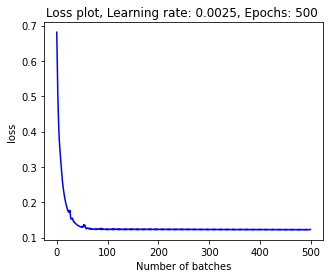

Optimizer: adam
Betas Adam(0.9, 0.999)
Weight_init:  divide_by_prod
Batch_size: 200
Epochs: 500
Learning_Rate: 0.0025
Momentum: 0.2
Weight_decay(L2): 0.03
Train_Loss: 0.12308242917060852
Test_Loss: 0.4133555591106415
Train_accuracy: 1.0
Test_accuracy: 0.8308457711442786
Normalize: False
Shuffle Data:False
Augment Data:False



In [398]:
net_init(n_x, n_1, n_2, activation1, optimizer_name)
train_loss, batch_size, epochs, fig = train_model(X_train, y_train, bs, ep, shuffle=shuffle,  normalize = normalize)
test_loss = test_model(X_val,y_val)
train_acc = train_accuracy(X_train, y_train)
test_acc = test_accuracy(X_val, y_val)
# Weight_init, Batch_size, Epochs, Learning_Rate, Momentum, Weight_decay(L2), Train_Loss, Test_Loss, Train_accuracy, Test_accuracy

res_file = open("hw3_deeplearning/results_movie_reviews.txt","a")
res_file.write(optimizer_name +  "," + activation1 + "," + str(weight_init) + "," + str(batch_size) +","+ str(epochs) + "," + str(learning_rate) + "," + str(momentum)+"," + 
              str(weight_decay) +"," + str(train_loss) + "," + str(test_loss) + "," + str(train_acc) +","+ str(test_acc) +  ","+ "Shuffle=" + str(shuffle) + "," + "Normalize=" + str(normalize) + ","+"Augment=" + str(augment) + "\n"  )
res_file.close()


print("Optimizer: " + optimizer_name + "\n" +
      "Betas Adam" + str(betas_adam) + "\n" +
      "Weight_init:  " + weight_init +"\n"+
      "Batch_size: " + str(batch_size)  +"\n" + 
      "Epochs: " + str(epochs) +"\n"+
      "Learning_Rate: " + str(learning_rate) +"\n"+
      "Momentum: " + str(momentum) +"\n"+ 
      "Weight_decay(L2): " + str(weight_decay) +"\n" +
      "Train_Loss: " + str(train_loss) +"\n"+
      "Test_Loss: " + str(test_loss) +"\n" + 
      "Train_accuracy: " + str(train_acc) +"\n" + 
      "Test_accuracy: " + str(test_acc) + "\n" +
      "Normalize: " +  str(normalize) + "\n" +
      "Shuffle Data:" + str(shuffle) + "\n" + 
      "Augment Data:" + str(augment) + "\n"
      )